In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mereldet import function_under_test, calculate_cost, _nominator, _denominator, MRCandidate

# Cost distribution for two function under test and two MR candidates

The two functions under test are 
$$ \text{prod: } f(x, y) = x * y $$
and
$$ \text{sum: } f(x, y) = x + y $$

The two MR candidates are close to an MR of the each function under test and are given by

$$ \text{near prod mr: } g(x, y) = (x * 2, y * 0.51) $$
and 
$$ \text{near sum mr: } g(x, y) = (x - 1, y + 1.1) $$

In [2]:
# Metamorphic relation guesses
mr = dict(
    near_sum_mr=MRCandidate.from_identity().set_bias(np.array([-1.0, 1.1])),
    near_prod_mr=MRCandidate.from_identity().set_scale(np.array([[2.0, 0.0], [0.0, 0.51]])),
)

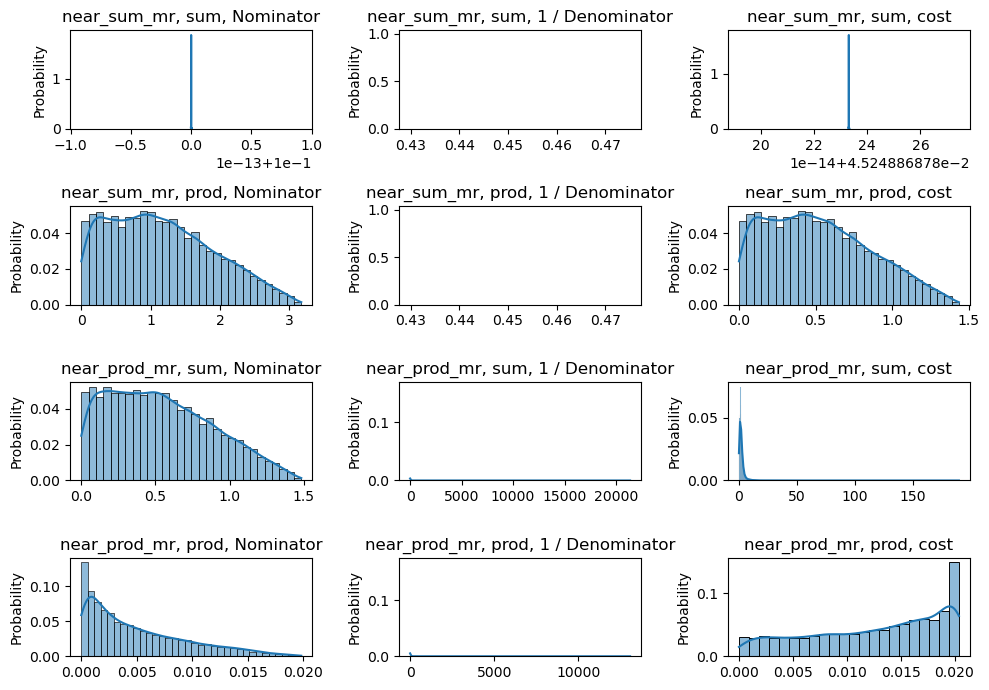

In [3]:
def calc_cost(fun_ident: str, mr_guessed):
    input = 2 * np.random.rand(10000, 2) - 1
    known_mrs = [MRCandidate.from_identity()]

    nom = [_nominator(x, function_under_test[fun_ident], mr_guessed) for x in input]
    denom = [1 / _denominator(x, mr_guessed, known_mrs) for x in input]

    cost = [n * d for n, d in zip(nom, denom)]

    return nom, denom, cost


def viz_cost(fun_ident: str, mr_ident: str, ax):
    mr_guessed = mr[mr_ident]
    n, d, cost = calc_cost(fun_ident, mr_guessed)

    ax[0].set_title(f"{mr_ident}, {fun_ident}, Nominator")
    ax[1].set_title(f"{mr_ident}, {fun_ident}, 1 / Denominator")
    ax[2].set_title(f"{mr_ident}, {fun_ident}, cost")
    sns.histplot(n, stat="probability", kde=True, ax=ax[0])
    sns.histplot(d, stat="probability", kde=True, ax=ax[1])
    sns.histplot(cost, stat="probability", kde=True, ax=ax[2])


fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(len(mr) * len(function_under_test), 3)
for n, mr_ident in enumerate(mr.keys()):
    for i, fun_ident in enumerate(function_under_test.keys()):
        viz_cost(
            fun_ident, mr_ident, [fig.add_subplot(gs[i + 2 * n, j]) for j in range(3)]
        )
plt.tight_layout()
